In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot

# Folder path containing the data files
folder_path = 'D:/internship 2022/data/regression_variables/\imputed_variables/'

# Get the list of file names in the folder
file_names = os.listdir(folder_path)

# List of features for autocorrelation plots
features = ['height', 'tws', 'precipitation', 'temp']  # Replace with your desired feature names

# Output directory for saving the plots
output_dir = r'D:\internship 2022\new_figures\imputed_autocorrelation'

# Create the output directory if it does not exist
os.makedirs(output_dir, exist_ok=True)

# Loop through each file in the folder
for file_name in file_names:
    file_path = os.path.join(folder_path, file_name)
    
    # Load the data file into a DataFrame
    data = pd.read_csv(file_path)
    
    # Check if the selected features are present in the data
    if all(feature in data.columns for feature in features):
        # Create autocorrelation plots for each feature
        for feature in features:
            plt.figure()
            autocorrelation_plot(data[feature])
            plt.title(f'Autocorrelation Plot: {feature} for {file_name}')
            plt.savefig(os.path.join(output_dir, f'{feature}_{file_name}.png'))
            #plt.show()
            plt.close()


In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Folder path containing the data files
folder_path = 'D:/internship 2022/data/regression_variables/imputed_variables/'

# Get the list of file names in the folder
file_names = os.listdir(folder_path)

output_dir = 'D:/internship 2022/new_figures/scatter_plots_features'
os.makedirs(output_dir, exist_ok=True)



# Loop through each file in the folder
for file_name in file_names:
    file_path = os.path.join(folder_path, file_name)
    
    # Load the data file into a DataFrame
    df = pd.read_csv(file_path)
    data=df.dropna()


    # Calculate the correlations
    corr_precipitation, _ = pearsonr(data['height'], data['precipitation'])
    corr_temperature, _ = pearsonr(data['height'], data['temp'])
    corr_tws, _ = pearsonr(data['height'], data['tws'])
    
    # Plot the variables against reservoir height
    plt.figure(figsize=(12, 6))
    plt.subplot(2, 2, 1)
    plt.scatter(data['height'], data['precipitation'])
    plt.xlabel('Reservoir Height')
    plt.ylabel('Precipitation')
    plt.title(f'Precipitation vs Reservoir Height\nCorrelation: {corr_precipitation:.2f}')

    plt.subplot(2, 2, 2)
    plt.scatter(data['height'], data['temp'])
    plt.xlabel('Reservoir Height')
    plt.ylabel('Temperature')
    plt.title(f'Temperature vs Reservoir Height\nCorrelation: {corr_temperature:.2f}')
    
    plt.subplot(2, 2, 3)
    plt.scatter(data['height'], data['tws'])
    plt.xlabel('Reservoir Height')
    plt.ylabel('TWS')
    plt.title(f'TWS vs Reservoir Height\nCorrelation: {corr_tws:.2f}')
    
    plt.tight_layout()

    plot_file_name = os.path.join(output_dir, f'{file_name}_plot.png')
    plt.savefig(plot_file_name)
    #plt.show()
    plt.close()


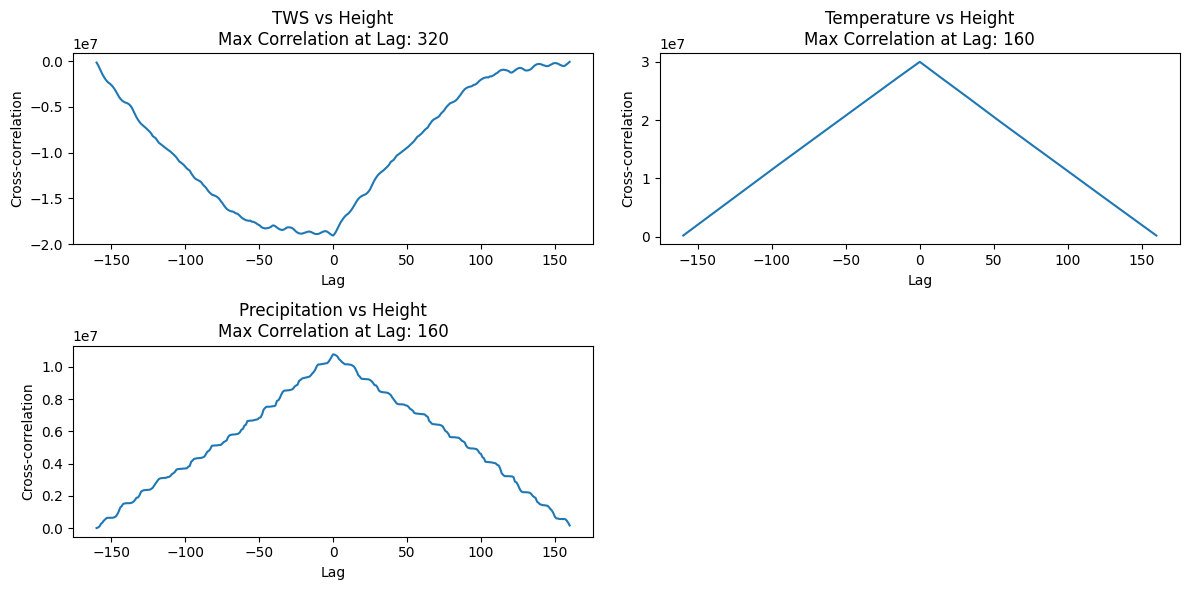

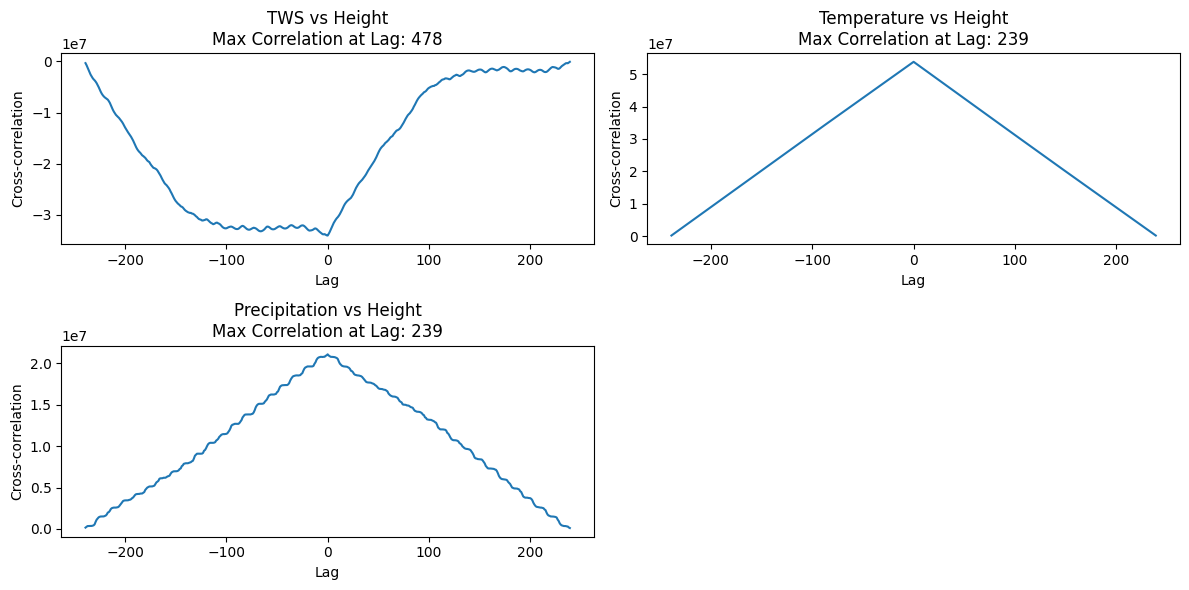

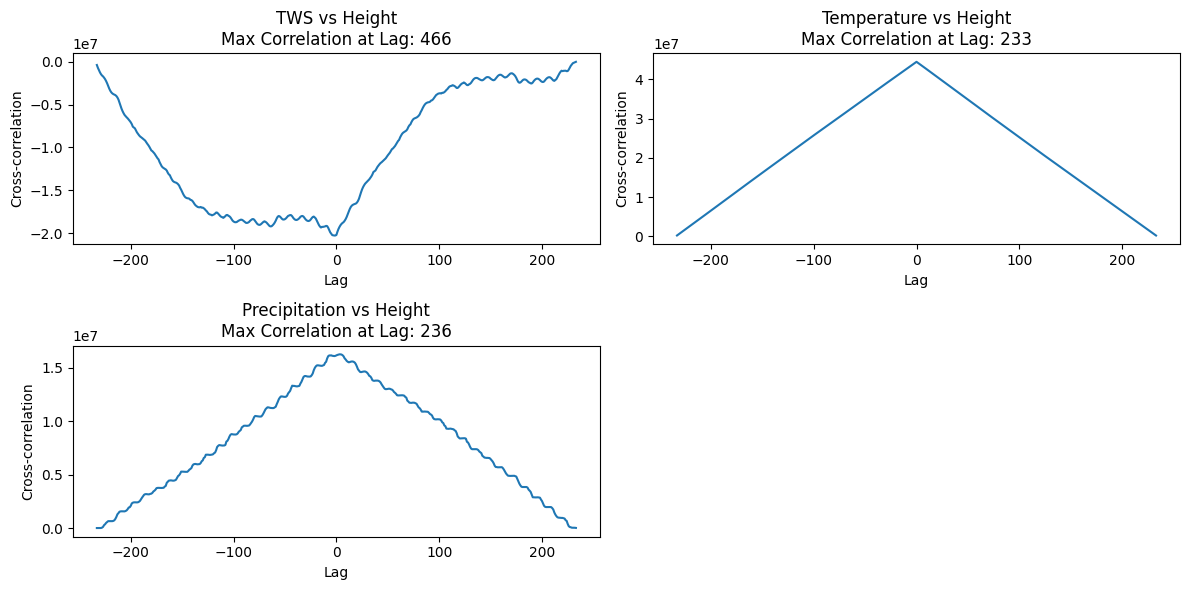

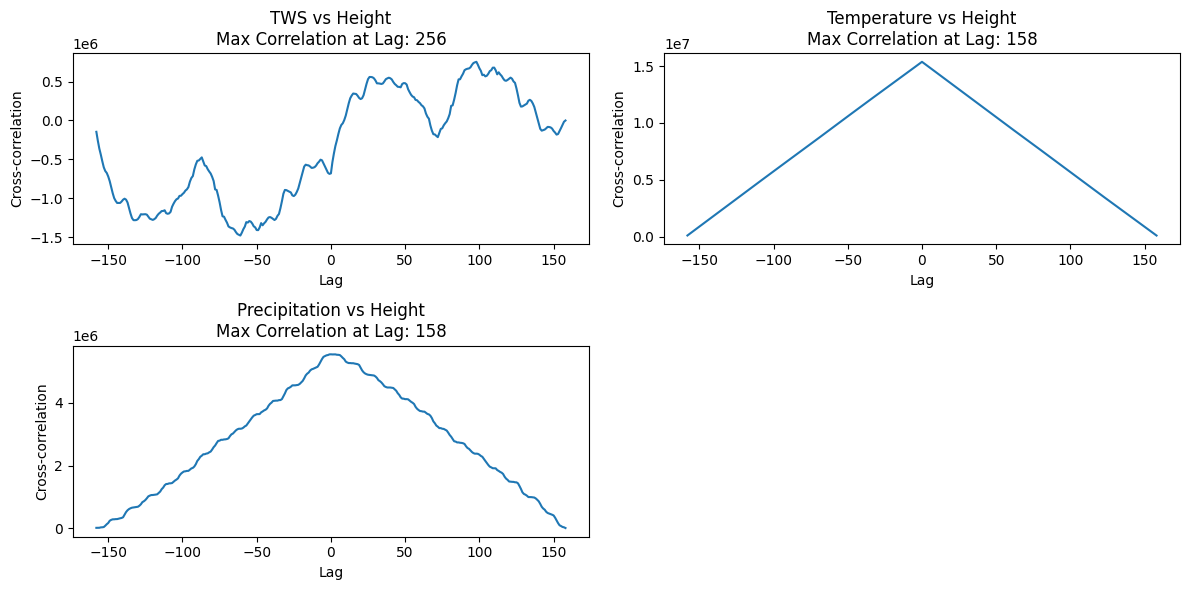

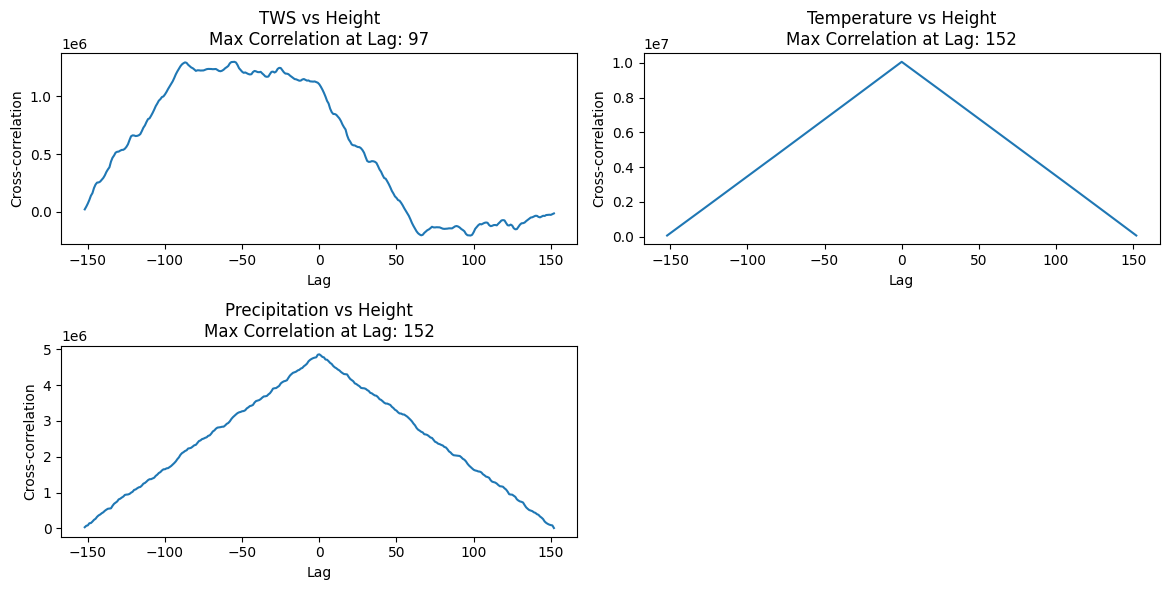

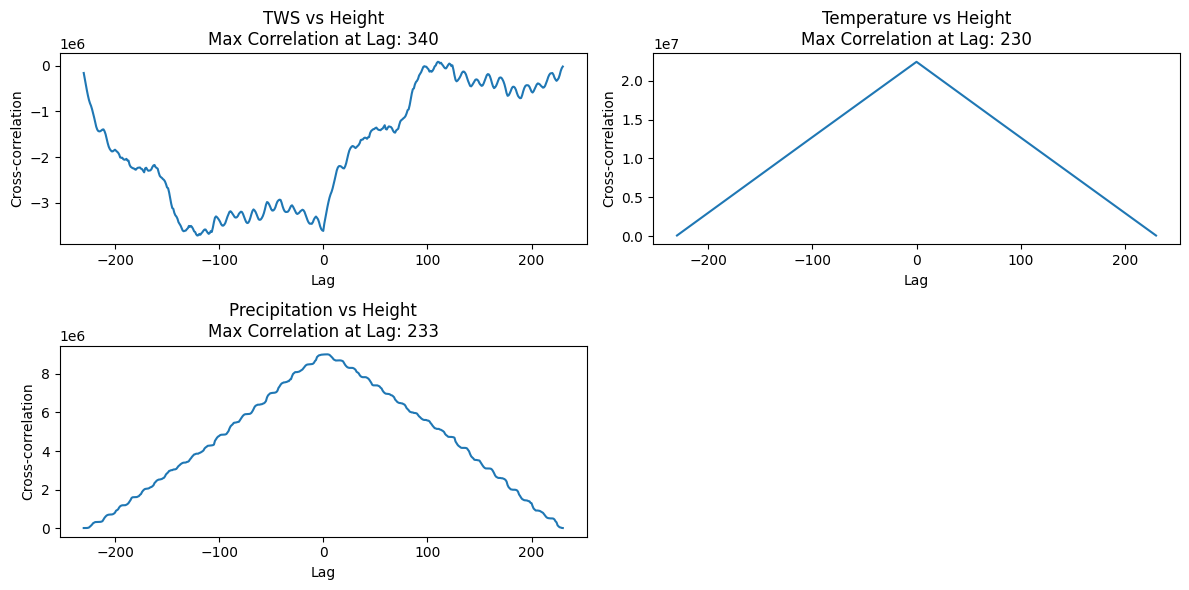

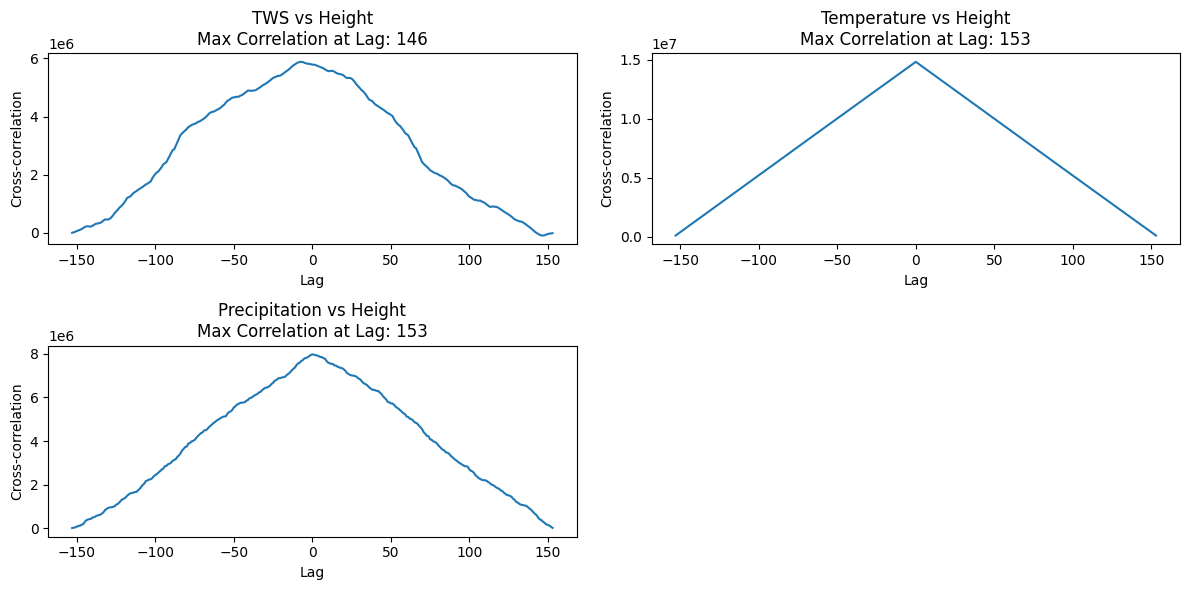

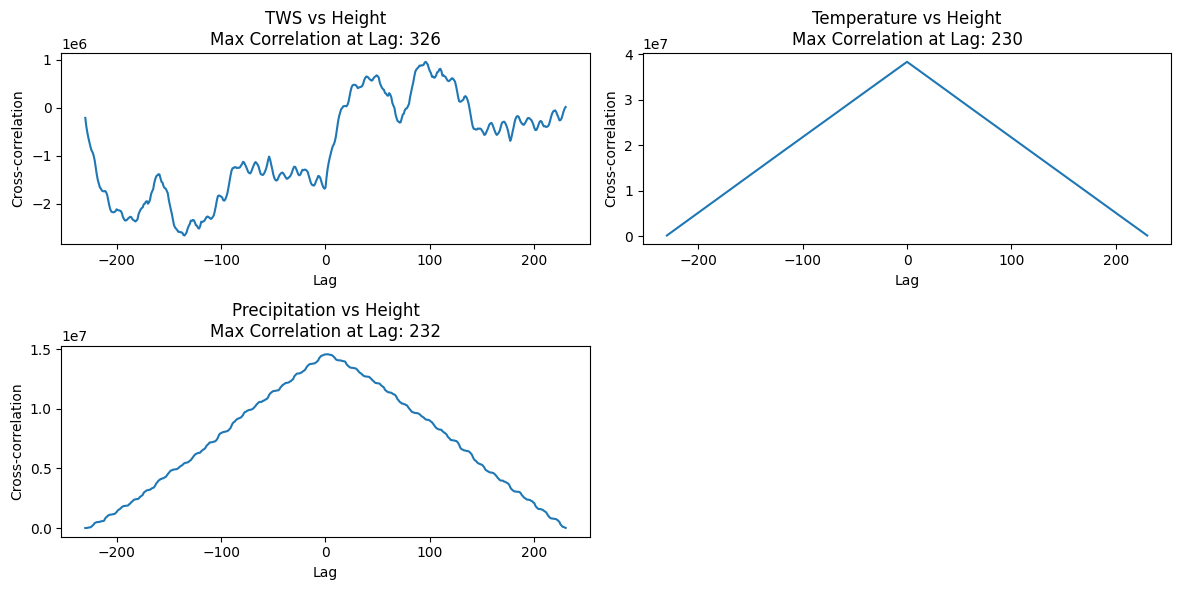

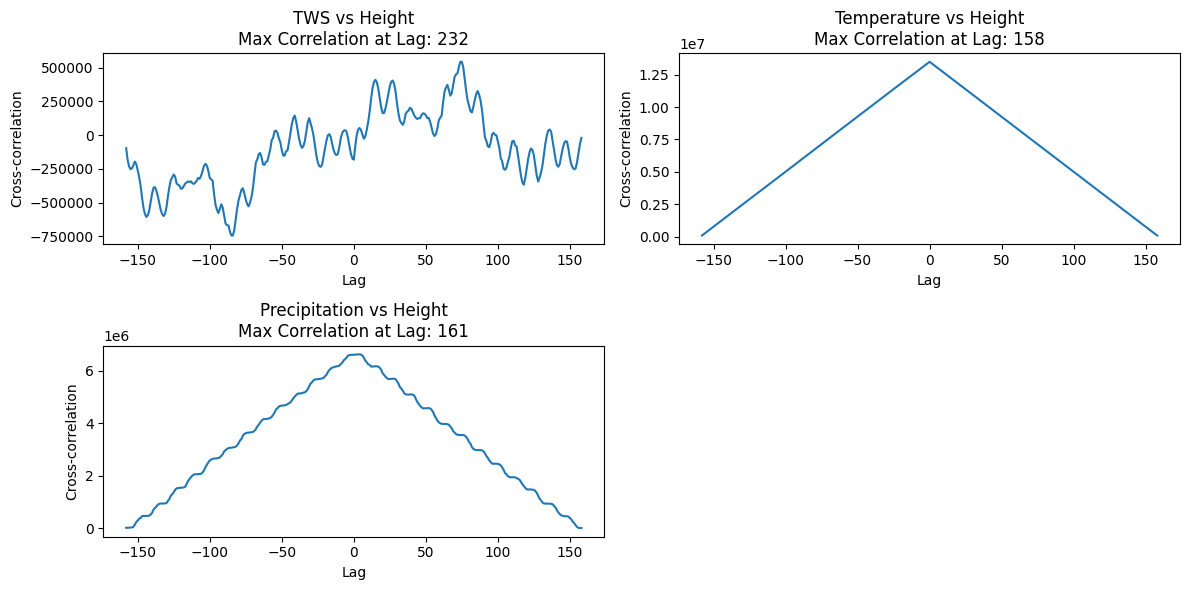

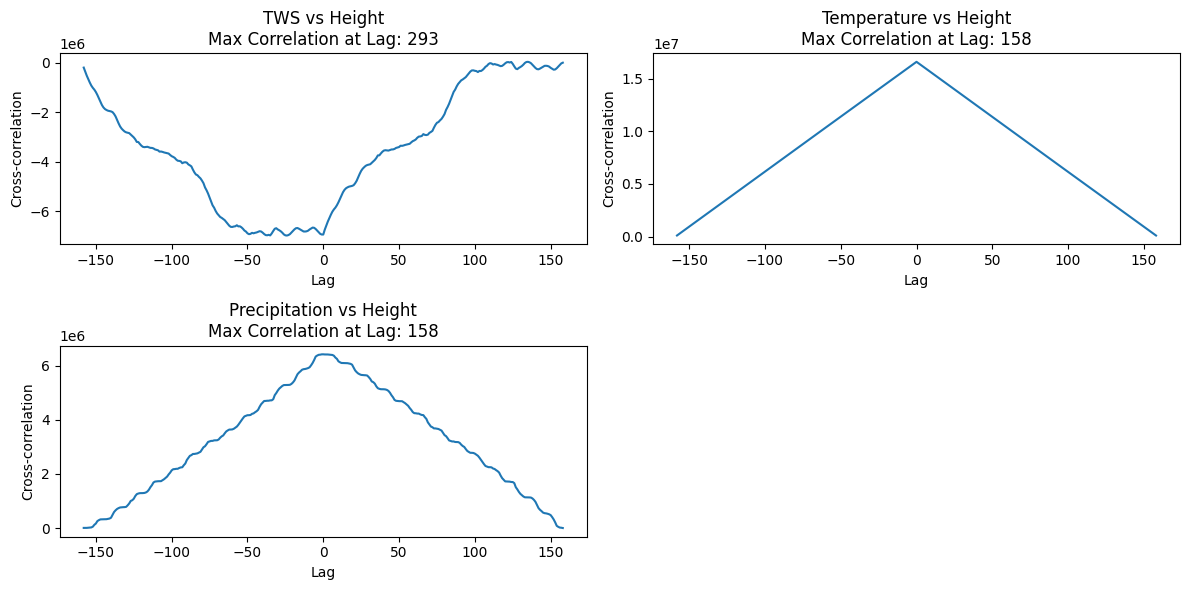

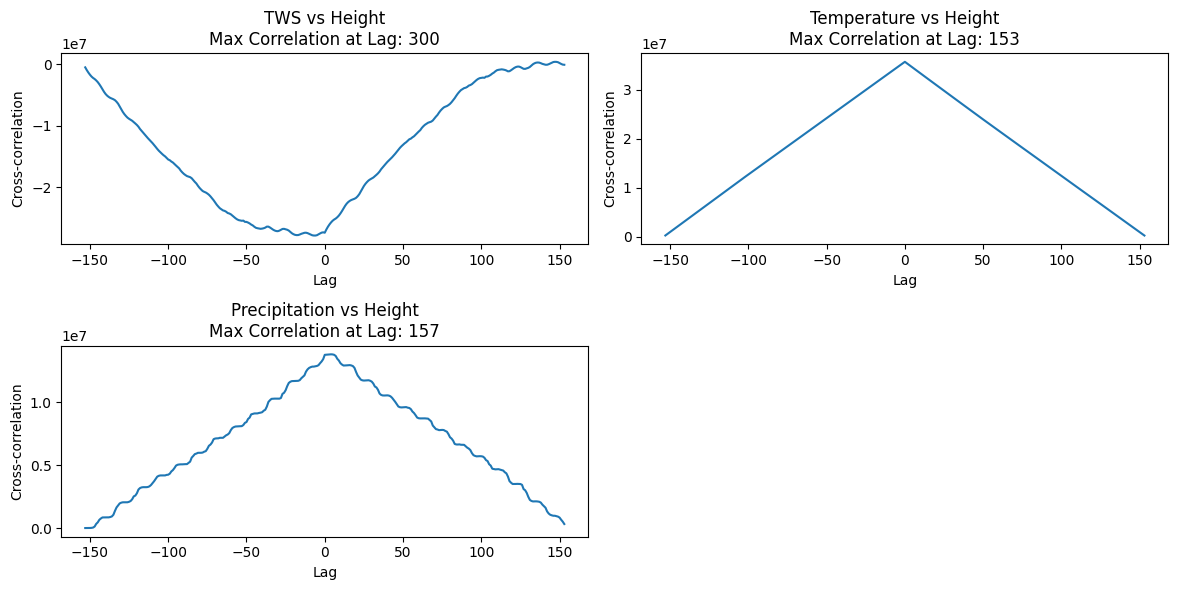

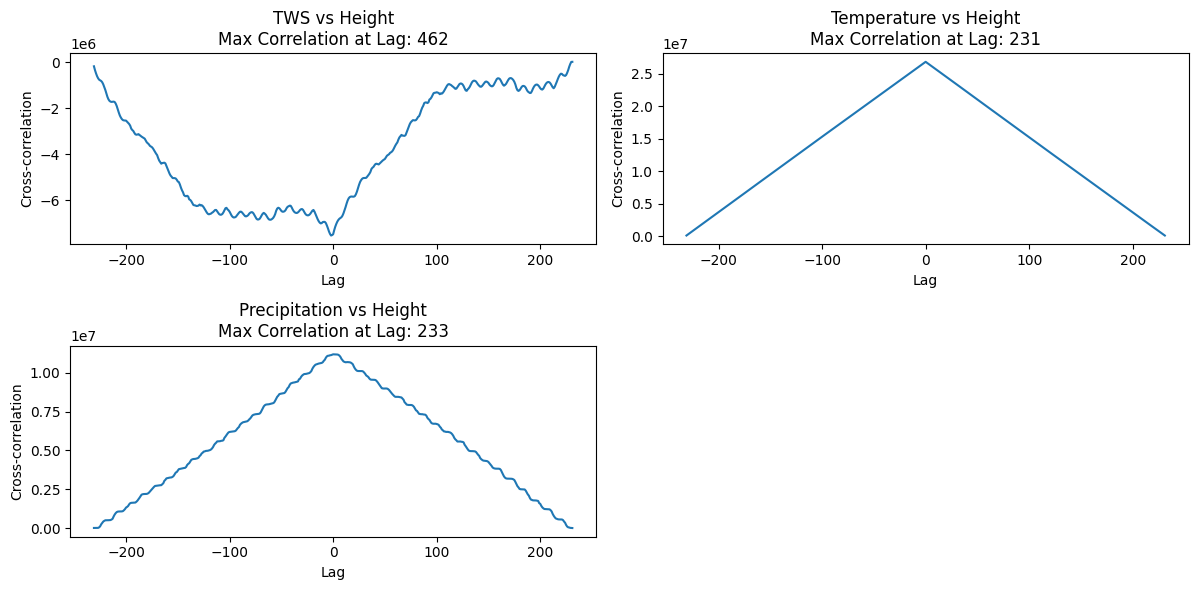

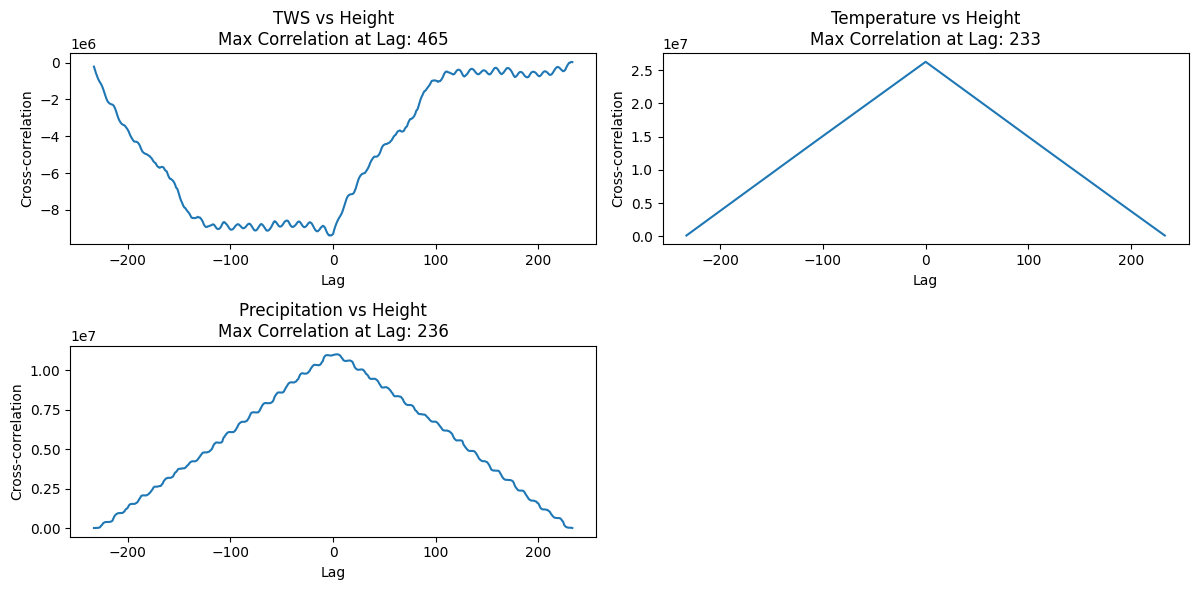

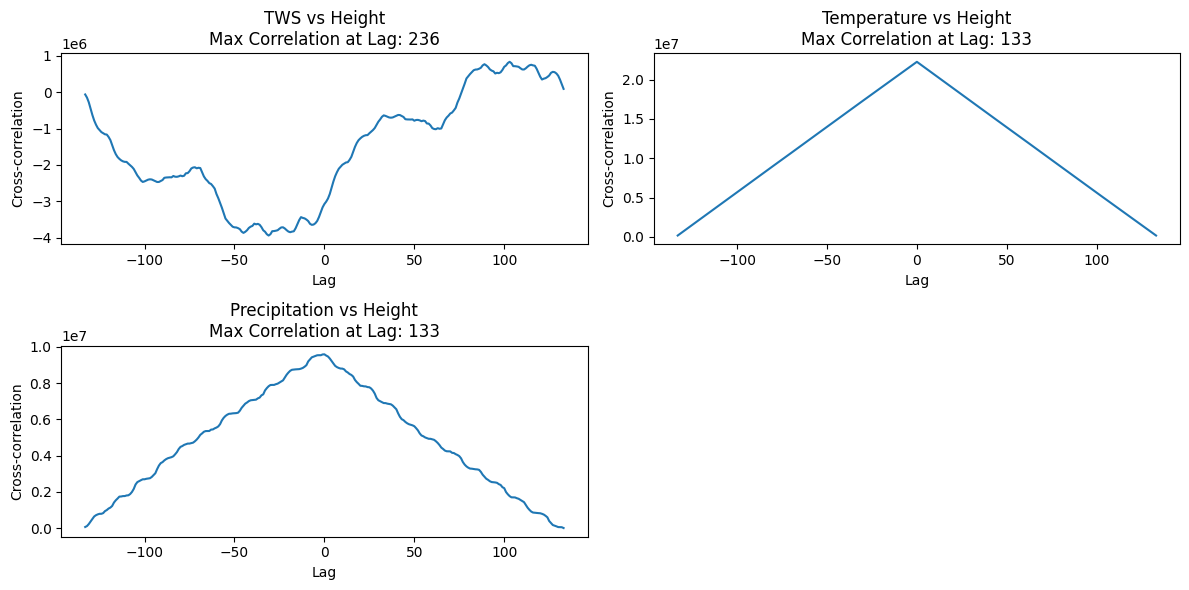

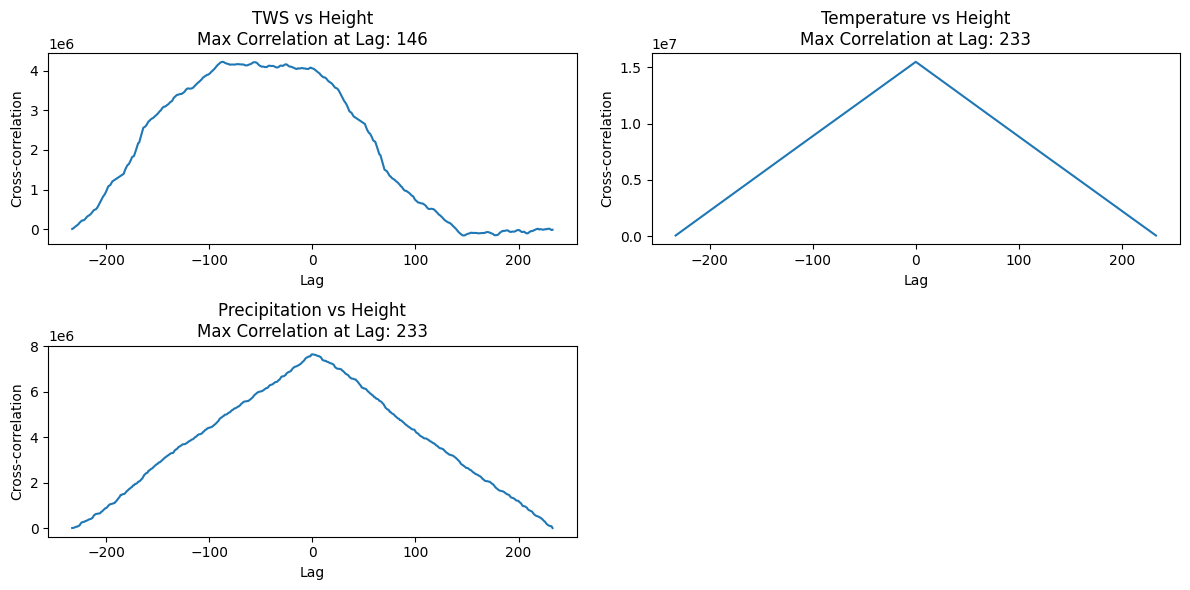

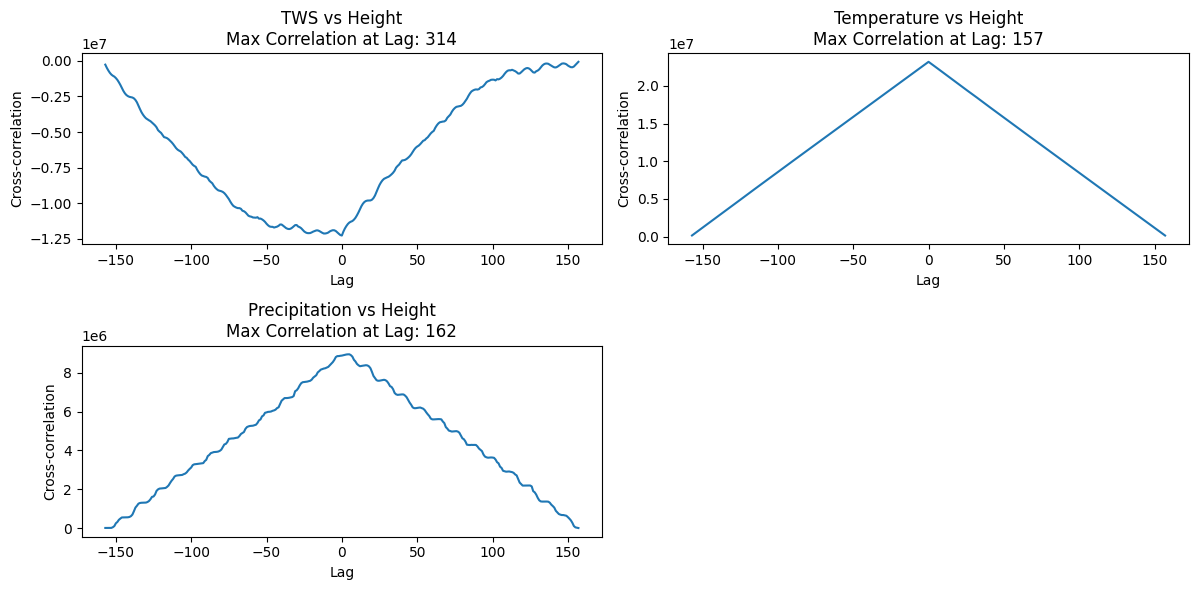

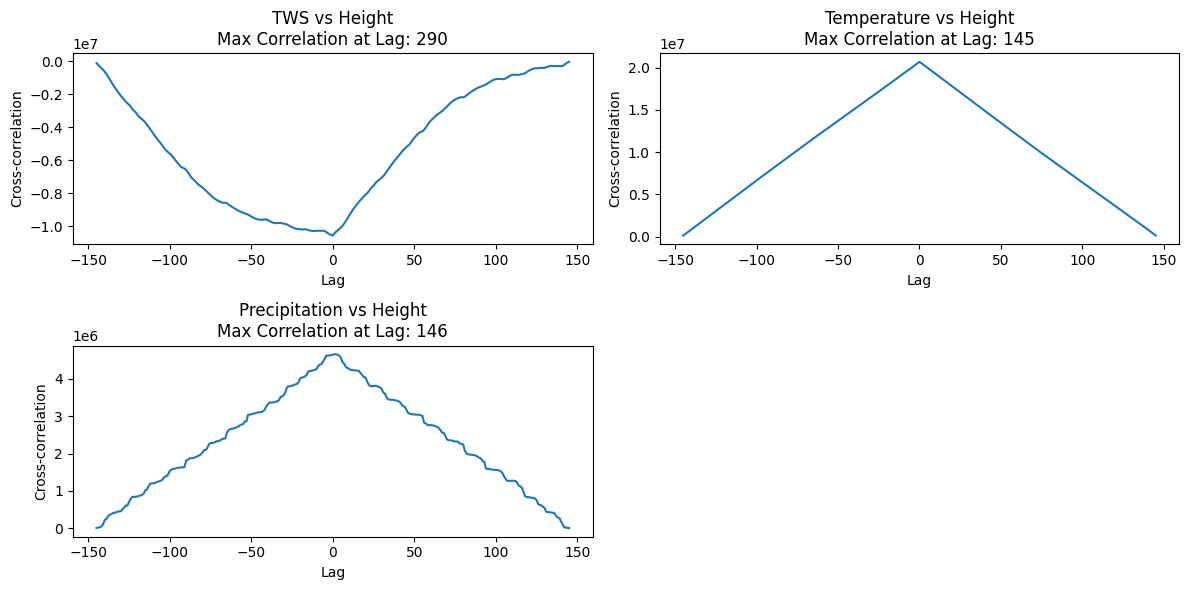

In [2]:
#is not correct, should be between -1 and 1 
import os
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import correlate

# Loop through each file in the folder
for file_name in file_names:
    file_path = os.path.join(folder_path, file_name)

    # Load the data file into a DataFrame
    df = pd.read_csv(file_path)
    data=df.dropna()


    # Compute cross-correlation
    cross_corr_tws = correlate(data['height'], data['tws'])
    cross_corr_temp = correlate(data['height'], data['temp'])
    cross_corr_precip = correlate(data['height'], data['precipitation'])

    # Find the lag with the maximum correlation
    lag_tws = cross_corr_tws.argmax()
    lag_temp = cross_corr_temp.argmax()
    lag_precip = cross_corr_precip.argmax()

    # Plot the cross-correlation
    plt.figure(figsize=(12, 6))
    plt.subplot(2, 2, 1)
    plt.plot(range(-len(data)+1, len(data)), cross_corr_tws)
    plt.xlabel('Lag')
    plt.ylabel('Cross-correlation')
    plt.title(f'TWS vs Height\nMax Correlation at Lag: {lag_tws}')

    plt.subplot(2, 2, 2)
    plt.plot(range(-len(data)+1, len(data)), cross_corr_temp)
    plt.xlabel('Lag')
    plt.ylabel('Cross-correlation')
    plt.title(f'Temperature vs Height\nMax Correlation at Lag: {lag_temp}')

    plt.subplot(2, 2, 3)
    plt.plot(range(-len(data)+1, len(data)), cross_corr_precip)
    plt.xlabel('Lag')
    plt.ylabel('Cross-correlation')
    plt.title(f'Precipitation vs Height\nMax Correlation at Lag: {lag_precip}')

    plt.tight_layout()
    plt.show()
